In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer

np.random.seed(42)
df = pd.read_csv('/content/dataset.csv')
round_data = df.groupby(['ct_score', 't_score', 'map']).last().reset_index()

win_rates = round_data.groupby(['bomb_planted', 'round_winner']).size().unstack()
win_percentages = win_rates.div(win_rates.sum(axis=1), axis=0) * 100
print(win_percentages)

features = round_data.drop('round_winner', axis=1)
target = round_data['round_winner']

categorical_cols = features.select_dtypes(include=['object', 'bool']).columns
numerical_cols = features.select_dtypes(include=['int64', 'float64']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, shuffle=True)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print('The accuracy is:', accuracy)
print(report)

round_winner         CT          T
bomb_planted                      
False         71.728749  28.271251
True          27.551020  72.448980
The accuracy is: 0.8989637305699482
              precision    recall  f1-score   support

          CT       0.88      0.93      0.91       206
           T       0.92      0.86      0.89       180

    accuracy                           0.90       386
   macro avg       0.90      0.90      0.90       386
weighted avg       0.90      0.90      0.90       386



In [ ]:
info = df[df['bomb_planted'] == True]
prob = model.predict_proba(info)
t_win_bomb_planted = prob[:, np.where(model.classes_ == 'T')[0][0]]
avg_prob = t_win_bomb_planted.mean()
print('The probability of T side winning the round with planted bomb is:', round(avg_prob,3))

info_2 = df[df['bomb_planted'] == False]
prob = model.predict_proba(info_2)
t_win_bomb_not_planted = prob[:, np.where(model.classes_ == 'T')[0][0]]
avg_prob_2 = t_win_bomb_not_planted.mean()
print('The probability of T side winning the round without planted bomb is:', round(avg_prob_2, 3))


The probability of T side winning the round with planted bomb is: 0.729
The probability of T side winning the round without planted bomb is: 0.334


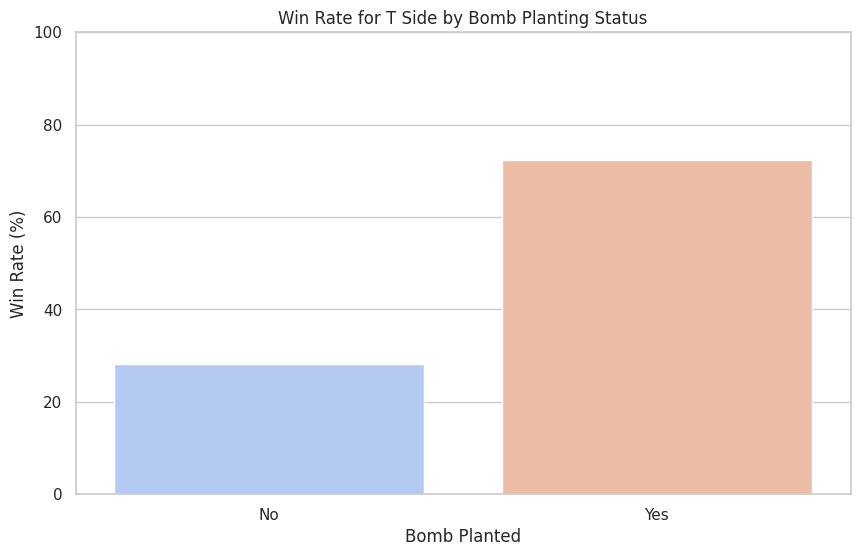

<Figure size 2000x1000 with 0 Axes>

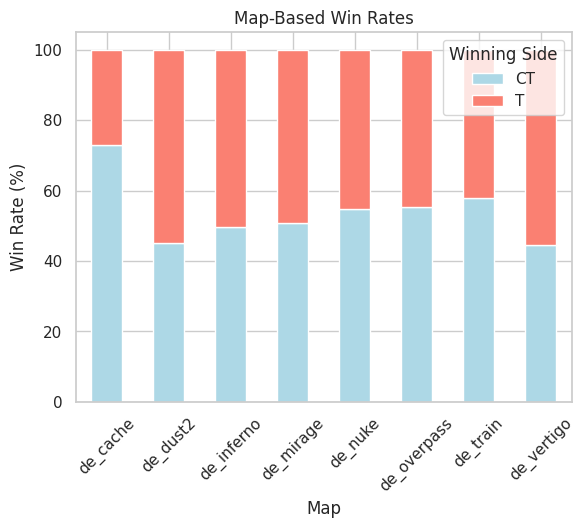

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Win rate by whether planting the bomb
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=win_percentages.index, y=win_percentages['T'], palette='coolwarm')
plt.title('Win Rate for T Side by Bomb Planting Status')
plt.ylabel('Win Rate (%)')
plt.xlabel('Bomb Planted')
plt.xticks([0, 1], ['No', 'Yes'])
plt.ylim(0, 100)
plt.show()

# Map-Based Win Rates
map_win_rates = round_data.groupby(['map', 'round_winner']).size().unstack()
map_win_percentages = map_win_rates.div(map_win_rates.sum(axis=1), axis=0) * 100

plt.figure(figsize=(20, 10))
map_win_percentages.plot(kind='bar', stacked=True, color=['lightblue', 'salmon'])
plt.title('Map-Based Win Rates')
plt.ylabel('Win Rate (%)')
plt.xlabel('Map')
plt.xticks(rotation=45)
plt.legend(title='Winning Side', loc='upper right')
plt.show()
